#Proyecto Final Fase 3 Módulo 4 BEDU

##Análisis de datos con Python - Equipo 4

###Integrantes: 
- Juan Manuel Ledesma Rangel
- Hannia Melendres Samaniego
- Alejandro Cortez Sánchez
- Martín Otamendi Torres


---
##A. [Previo] Procesamiento de datos

###A.1 Problema:
> Obtener un crédito de una institución financiera depende de muchos factores. Las recomendaciones usuales que pueden encontrarse en blogs o canales de finanzas, recomendaciones propias de los bancos o de expertos en el área suelen ser las siguientes:
* Comprobar ingresos
* Tener un buen historial crediticio
* Tener buenas referencias
>
> Sin embargo, cumplir con estas recomendaciones no siempre es garantía de que obtendremos la aprobación del crédito. Es por eso que para determinar si hay otros factores involucrados, como el género, la edad, rasgos raciales, estado civil, entre otros.

###A.2 Fundamento teórico del proyecto:
> Se puede encontrar en orden en el siguiente documento de Google: https://docs.google.com/document/d/1nbC2af8jHUDiPumL37MXzTYX_cTbfi-urIsh3yPr1fo/edit?usp=sharing

###A.3 Planteamiento de preguntas
Tras realizar la investigación preliminar, surgieron las siguientes preguntas (también encontradas dentro del documento comentado con anterioridad):

1.   _¿Cumplir con las recomendaciones anteriores (ingresos, historial y referencias) asegura obtener la aprobación de la tarjeta de crédito?_
2.   _Si hay casos en los que lo anterior no se cumple, ¿existen factores consistentes para ello?_
3.   _¿Existe correlación entre el género y la aprobación de la tarjeta de crédito?_
4.   _¿Existe correlación entre la edad y la aprobación de la tarjeta de crédito?_
5.   _¿Existe correlación entre los rasgos raciales y la aprobación de la tarjeta de crédito?_

### A.4 Colección de datos/AED/Limpieza

Para el análisis, utilizaremos los dataset (en formato .csv)...

>"credit_card_approvals_clean.csv"

obtenido desde https://www.kaggle.com/datasets/samuelcortinhas/credit-card-approval-clean-data?select=crx.csv, y encontrado en nuestro repositorio.

####A.4.1 Importación y AED

Realizamos un análisis exploratorio de datos para conocerlos.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/HanniaMele/bedu-equipo4-dataScience-M4/main/raw_data/credit_card_approvals_clean.csv")

df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [ ]:
df.tail()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0
689,1,35.00,3.375,1,1,Energy,Black,8.29,0,0,0,1,ByBirth,0,0,0


In [ ]:
df.shape

(690, 16)

####A.4.2 Mapping e indexación de filas

In [ ]:
df.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

Observamos las columnas y notamos que estás no tienen el formato `snake_case`, por lo que realizamos mapping.

In [ ]:
df = df.rename({"Gender": "gender",
            "Age": "age",
            "Debt": "debt",
            "Married": "married",
            "BankCustomer": "bank_customer",
            "Industry": "industry",
            "Ethnicity": "ethnicity",
            "YearsEmployed": "years_employed",
            "PriorDefault": "prior_default",
            "Employed": "employed",
            "CreditScore": "credit_score",
            "DriversLicense": "driver_license",
            "Citizen": "citizen",
            "ZipCode": "zip_code",
            "Income": "income",
            "Approved": "approved"},
            axis = 1)

df.head()

,gender,age,debt,married,bank_customer,industry,ethnicity,years_employed,prior_default,employed,credit_score,driver_license,citizen,zip_code,income,approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


####A.4.3 NaNs

Buscamos nans con la función `.isna()`.

In [ ]:
df.isna().sum(axis=0)

gender            0
age               0
debt              0
married           0
bank_customer     0
industry          0
ethnicity         0
years_employed    0
prior_default     0
employed          0
credit_score      0
driver_license    0
citizen           0
zip_code          0
income            0
approved          0
dtype: int64

Nuestros datos están **limpios**.

####A.4.4 Tipos de datos

Verificamos tipos de datos con `.dtypes`.

In [ ]:
df.dtypes

gender              int64
age               float64
debt              float64
married             int64
bank_customer       int64
industry           object
ethnicity          object
years_employed    float64
prior_default       int64
employed            int64
credit_score        int64
driver_license      int64
citizen            object
zip_code            int64
income              int64
approved            int64
dtype: object

Nuestros datos están correctamente tipeados y **listos para usarse**.

---
##B. Estimados de locación y variabilidad - Postwork 1

###B.1 Datos estructurados
Visualizamos `.head()` de nuestro dataset nuevamente...

In [ ]:
df.head()

,gender,age,debt,married,bank_customer,industry,ethnicity,years_employed,prior_default,employed,credit_score,driver_license,citizen,zip_code,income,approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


y notamos que contamos tanto con `variables cualitativas` como `variables cuantitativas`.

####B.1.1 Datos cualitativos no binarios

Tras analizar e investigar la fuente de nuestro dataset, determinamos que hay dos tipos de datos categóricos (no binarios)...

- Aquellos con valores textuales (strings):

In [ ]:
df[["industry", "ethnicity", "citizen"]].dtypes

industry     object
ethnicity    object
citizen      object
dtype: object

- Aquellos con valores numéricos:

In [ ]:
df[["credit_score", "zip_code"]].dtypes

credit_score    int64
zip_code        int64
dtype: object

Para el caso de `zip_code`, sus valores determinan cierta zona geográfica. En cambio, para `credit_score`, sus valores indican el puntaje crediticio obtenido según reportes anteriores a la solicitud de tarjeta de crédito de este dataset. 

Los bancos (y otras empresas como aquellas de tiendas departamentales) cuentan con su rango de puntaje crediticio que van otorgando a sus clientes según corresponda. Por ende, este último ya tiene un rango establecido desde mucho antes, convirtiéndolo en una variable categórica a pesar de contar con valores numéricos.

Sus valores para este dataset son:

In [ ]:
np.unique(df["credit_score"])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 19, 20, 23, 40, 67])

####B.1.2 Datos cualitativos binarios

Solo por la visualización del `.head()`, podemos suponer cuáles de nuestras columnas contienen datos binarios. Sin embargo, lo comprobaremos con la función `np.unique()`.

In [ ]:
#Columna gender
print(f"Para 'gender':")
print(np.unique(df["gender"]))
print("\n")

#Columna married
print(f"Para 'married':")
print(np.unique(df["married"]))
print("\n")

#Columna bank_customer
print(f"Para 'bank_customer':")
print(np.unique(df["bank_customer"]))
print("\n")

#Columna prior_default
print(f"Para 'prior_default':")
print(np.unique(df["prior_default"]))
print("\n")

#Columna employed
print(f"Para 'employed':")
print(np.unique(df["employed"]))
print("\n")

#Columna driver_license
print(f"Para 'driver_license':")
print(np.unique(df["driver_license"]))
print("\n")

#Columna approved
print(f"Para 'approved':")
print(np.unique(df["approved"]))
print("\n")

Para 'gender':
[0 1]


Para 'married':
[0 1]


Para 'bank_customer':
[0 1]


Para 'prior_default':
[0 1]


Para 'employed':
[0 1]


Para 'driver_license':
[0 1]


Para 'approved':
[0 1]




Y efectivamente, todas las columnas que sospechábamos de tipo binario, resultaron serlo.

####B.1.3 Datos cuantitativos

Nuestros datos cuantitativos son:

In [ ]:
df[["age", "debt", "years_employed", "income"]].dtypes

age               float64
debt              float64
years_employed    float64
income              int64
dtype: object

###B.2 Estimados de locación
Con nuestros datos estructurados ya distinguidos, podemos proceder a conocerlos por medio de estadísticos y visualizaciones.

####B.2.1 Datos cuantitativos
La mayoría de estimados de locación o medidas de tendencia central se pueden realizar para datos cuantitativos. Así:

#####B.2.1.1 Media
Aplicamos `.mean()` a nuestros datos cuantitativos, para obtener el promedio.

In [ ]:
#Columna age
print(f"Para columna 'age', la media es de {round(df['age'].mean(), 2)}")
print("\n")

#Columna debt
print(f"Para columna 'debt', la media es de {round(df['debt'].mean(), 2)}")
print("\n")

#Columna years_employed
print(f"Para columna 'years_employed', la media es de {round(df['years_employed'].mean(),2)}")
print("\n")

#Columna age
print(f"Para columna 'income', la media es de {round(df['income'].mean(),2)}")
print("\n")

Para columna 'age', la media es de 31.51


Para columna 'debt', la media es de 4.76


Para columna 'years_employed', la media es de 2.22


Para columna 'income', la media es de 1017.39




#####B.2.1.2 Mediana
Aplicamos `.median()` a nuestros datos cuantitativos, para conocer el valor posicionado al centro.

In [ ]:
#Columna age
print(f"Para columna 'age', la mediana es de {round(df['age'].median(), 2)}")
print("\n")

#Columna debt
print(f"Para columna 'debt', la mediana es de {round(df['debt'].median(), 2)}")
print("\n")

#Columna years_employed
print(f"Para columna 'years_employed', la mediana es de {round(df['years_employed'].median(),2)}")
print("\n")

#Columna age
print(f"Para columna 'income', la mediana es de {round(df['income'].median(),2)}")
print("\n")

Para columna 'age', la mediana es de 28.46


Para columna 'debt', la mediana es de 2.75


Para columna 'years_employed', la mediana es de 1.0


Para columna 'income', la mediana es de 5.0




Aunque sencillos, estos dos datos ya nos están otorgando información interesante sobre nuestro dataset. Por ejemplo, para las columnas de age, debt y years_employed, entre la mediana y la media no parece haber una distinción tan severa, al menos no a primera vista. No obstante, la diferencia para la columna income es abismal, y puede indicarnos la existencia de datos atípicos.

#####B.2.1.3 Media truncada
[PREGUNTA PARA EL EQUIPO] ¿Creen que sea necesario hacer al menos una media truncada?

#####B.2.1.4 Desviación estándar
La desviación estándar nos permitirá identificar qué tan dispersos están nuestros datos. Para ello usamos la función `.std()`.

In [ ]:
#Columna age
print(f"Para columna 'age', la desviación estándar es de {round(df['age'].std(), 2)}")
print("\n")

#Columna debt
print(f"Para columna 'debt', la desviación estándar es de {round(df['debt'].std(), 2)}")
print("\n")

#Columna years_employed
print(f"Para columna 'years_employed', la desviación estándar es de {round(df['years_employed'].std(),2)}")
print("\n")

#Columna age
print(f"Para columna 'income', la desviación estándar es de {round(df['income'].std(),2)}")
print("\n")

Para columna 'age', la desviación estándar es de 11.86


Para columna 'debt', la desviación estándar es de 4.98


Para columna 'years_employed', la desviación estándar es de 3.35


Para columna 'income', la desviación estándar es de 5210.1




Con este nuevo dato, definitivamente notamos que la columna de "income" es un caso interesante.

#####B.2.1.5 Estadísticos de orden
Usando los estadísticos de orden, conoceremos las dimensiones de los valores de nuestros datos, y completaremos nuestra imagen mental de las distribuciones que hemos ido recopilando hasta ahora. Usamos la función `.quantile()`.

####B.2.2 Datos cualitativos
Se utiliza la moda, `statistics.mode()`, para conocer el valor que más se repite de un conjunto de datos categóricos. Así:

#####B.2.2.1 No binarios

In [ ]:
import statistics
print("De valor cadena:")

#Columna industry
print(f"Para columna 'industry', la moda es {statistics.mode(df['industry'])}")
print("\n")

#Columna ethnicity
print(f"Para columna 'ethnicity', la moda es {statistics.mode(df['ethnicity'])}")
print("\n")

#Columna citizen
print(f"Para columna 'citizen', la moda es {statistics.mode(df['citizen'])}")
print("\n")

#---------

print("De valor numérico:")

#Columna credit_score
print(f"Para columna 'credit_score', la moda es de {statistics.mode(df['credit_score'])}")
print("\n")

#Columna zip_code
print(f"Para columna 'zip_code', la moda es de {statistics.mode(df['zip_code'])}")
print("\n")

De valor cadena:
Para columna 'industry', la moda es Energy


Para columna 'ethnicity', la moda es White


Para columna 'citizen', la moda es ByBirth


De valor numérico:
Para columna 'credit_score', la moda es de 0


Para columna 'zip_code', la moda es de 0




#####B.2.2.2 Binarios

In [ ]:
#Columna gender
print(f"Para columna 'gender', la moda es {statistics.mode(df['gender'])}")
print("\n")

#Columna married
print(f"Para columna 'married', la moda es {statistics.mode(df['married'])}")
print("\n")

#Columna bank_customer
print(f"Para columna 'bank_customer', la moda es {statistics.mode(df['bank_customer'])}")
print("\n")

#Columna prior_default
print(f"Para columna 'prior_default', la moda es de {statistics.mode(df['prior_default'])}")
print("\n")

#Columna employed
print(f"Para columna 'employed', la moda es de {statistics.mode(df['employed'])}")
print("\n")

#Columna driver_license
print(f"Para columna 'driver_license', la moda es de {statistics.mode(df['driver_license'])}")
print("\n")

#Columna approved
print(f"Para columna 'approved', la moda es de {statistics.mode(df['approved'])}")
print("\n")

Para columna 'gender', la moda es 1


Para columna 'married', la moda es 1


Para columna 'bank_customer', la moda es 1


Para columna 'prior_default', la moda es de 1


Para columna 'employed', la moda es de 0


Para columna 'driver_license', la moda es de 0


Para columna 'approved', la moda es de 0




---
## C. Introducción a visualización de datos: Visualizaciones  - Postwork 2


* Utiliza boxplots para analizar la distribución de tus variables numéricas. Piensa acerca de cuáles son los valores típicos y atípicos y dónde están concentrados el grueso de tus datos.
* Utiliza el Score de Rango Intercuartílico para filtrar tus valores atípicos. Compara tus medianas, medias y desviaciones estándares antes y después de realizar la filtración y ve cuánto cambiaron.
* Utiliza tablas de frecuencia e histogramas para observar la distribución de tus variables. Caracteriza cada una de las distribuciones usando los términos que aprendiste durante la sesión. Obtén medidas de asimetría y curtosis para ver qué tan alejadas de la distribución normal están tus variables.
* Utiliza gráficas de densidad para comparar una variable numérica que pueda ser segmentada en dos o más categorías. Usa esta técnica para entender mejor cómo están distribuidos tus datos en cada uno de los grupos presentes.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df

,gender,age,debt,married,bank_customer,industry,ethnicity,years_employed,prior_default,employed,credit_score,driver_license,citizen,zip_code,income,approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


In [ ]:
df.dtypes

gender              int64
age               float64
debt              float64
married             int64
bank_customer       int64
industry           object
ethnicity          object
years_employed    float64
prior_default       int64
employed            int64
credit_score        int64
driver_license      int64
citizen            object
zip_code            int64
income              int64
approved            int64
dtype: object

In [ ]:
#Establecemos el estilo de la gráfica
sns.set_style("whitegrid") 

#Creamos una función que nos permitirá graficar todas mis boxplots 
def grafica_boxplots(df_numerico):
  tam = df_numerico.shape[1]

  fig, axis = plt.subplots(nrows=int(tam/2), ncols=int(tam/2), figsize=(16, 10), constrained_layout=True);

  ren = col = 0

  for (columnName, columnData) in df_numerico.iteritems():
    sns.boxplot(x=columnData.values, ax=axis[ren, col])
    axis[ren, col].set_title(f'Boxplot para {columnName}')
    axis[ren, col].set_xlabel(columnName.capitalize().replace('_', ' '))

    col += 1

    if(col == int(tam/2)):
      col = 0
      ren += 1

  fig.suptitle('Boxplots para variables numéricas', fontsize=18)

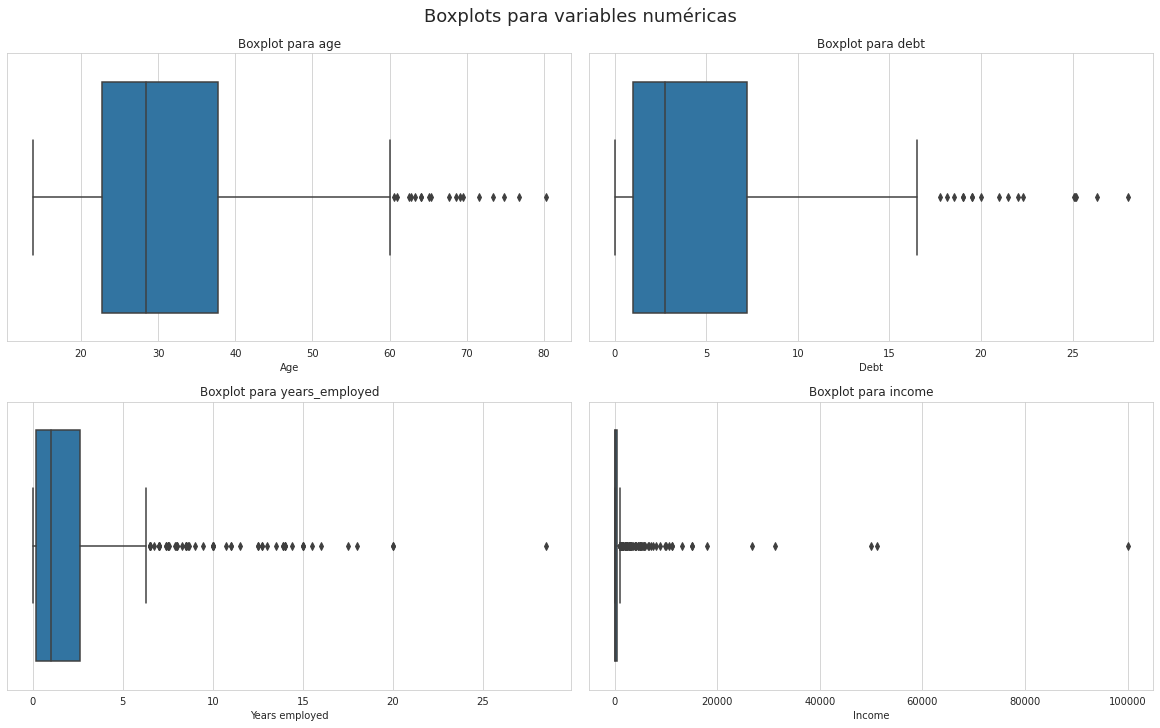

In [ ]:
#Graficamos los boxplots
df_numerico = df[["age", "debt", "years_employed", "income"]]

grafica_boxplots(df_numerico)

In [ ]:
#Observamos algunas estadísticas descriptivas de nuestros datos
describe_var_num = df_numerico.describe()
describe_var_num

,age,debt,years_employed,income
count,690.000000,690.000000,690.000000,690.000000
mean,31.514116,4.758725,2.223406,1017.385507
std,11.860245,4.978163,3.346513,5210.102598
min,13.750000,0.000000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.000000
50%,28.460000,2.750000,1.000000,5.000000
75%,37.707500,7.207500,2.625000,395.500000
max,80.250000,28.000000,28.500000,100000.000000


In [ ]:
#Filtro de valores atípicos usando el score del rango intercuartílico

#Creamos una copia de mi dataframe original
df_copy = df.copy()

#Creamos una función para no repetir código
def filtro_siqr(serie_numerica):
  global df_copy

  iqr = serie_numerica.quantile(0.75) - serie_numerica.quantile(0.25)
  filtro_inferior = serie_numerica > serie_numerica.quantile(0.25) - (iqr * 1.5)
  filtro_superior = serie_numerica < serie_numerica.quantile(0.75) + (iqr * 1.5)

  df_copy = df_copy[filtro_inferior & filtro_superior]

In [ ]:
#Filtramos 
df_numerico.apply(filtro_siqr, axis=0);

df_copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,gender,age,debt,married,bank_customer,industry,ethnicity,years_employed,prior_default,employed,credit_score,driver_license,citizen,zip_code,income,approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,1,40.58,3.290,1,1,CommunicationServices,White,3.50,0,0,0,1,ByOtherMeans,400,0,0
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0


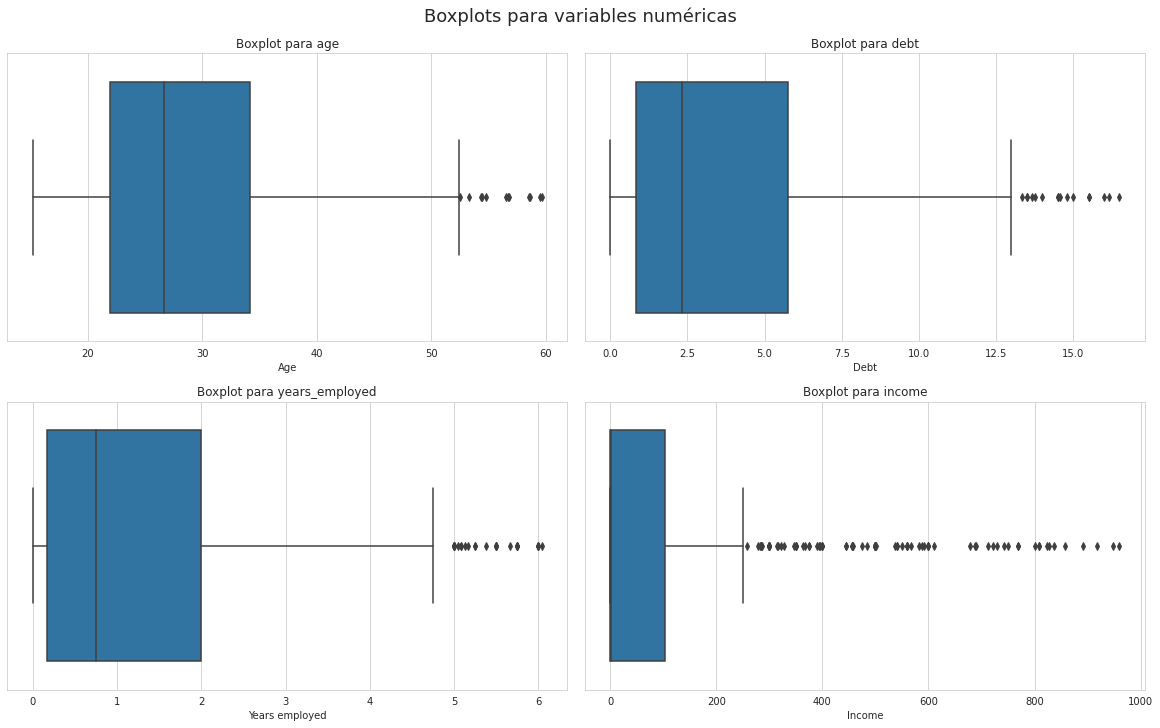

In [ ]:
#Volvemos a graficar nuestras boxplots
grafica_boxplots(df_copy[list(df_numerico.columns)])

In [ ]:
#Observamos algunas estadísticas descriptivas de nuestros datos luego de haber sido filtrados
describe_var_num = df_copy[list(df_numerico.columns)].describe()
describe_var_num

,age,debt,years_employed,income
count,519.000000,519.000000,519.000000,519.000000
mean,28.931541,3.978950,1.315424,105.319846
std,9.415928,4.091696,1.501684,204.876387
min,15.170000,0.000000,0.000000,0.000000
25%,21.920000,0.832500,0.165000,0.000000
50%,26.670000,2.335000,0.750000,1.000000
75%,34.125000,5.772500,2.000000,102.500000
max,59.670000,16.500000,6.040000,960.000000


In [ ]:
arr_bins = pd.Series(dtype=int)

#Crear función para encontrar los segmentos de mis variables numéricas
def obten_segmentos(serie_numerica):
  global arr_bins
  
  #Regla de Sturge
  num_bins = int(1 + np.ceil(np.log2(len(serie_numerica))))
  arr_bins[serie_numerica.name] = num_bins

  print(serie_numerica.groupby(pd.cut(serie_numerica, num_bins)).count())
  print('\n')

In [ ]:
#Generar tablas de frecuencias para las variables numericas 
df_copy[list(df_numerico.columns)].apply(obten_segmentos, axis=0);

age
(15.126, 19.215]     62
(19.215, 23.261]    119
(23.261, 27.306]     87
(27.306, 31.352]     78
(31.352, 35.397]     60
(35.397, 39.443]     36
(39.443, 43.488]     34
(43.488, 47.534]     15
(47.534, 51.579]     11
(51.579, 55.625]     10
(55.625, 59.67]       7
Name: age, dtype: int64


debt
(-0.0165, 1.5]    204
(1.5, 3.0]        103
(3.0, 4.5]         53
(4.5, 6.0]         35
(6.0, 7.5]         20
(7.5, 9.0]         13
(9.0, 10.5]        33
(10.5, 12.0]       27
(12.0, 13.5]       18
(13.5, 15.0]        8
(15.0, 16.5]        5
Name: debt, dtype: int64


years_employed
(-0.00604, 0.549]    245
(0.549, 1.098]        65
(1.098, 1.647]        52
(1.647, 2.196]        38
(2.196, 2.745]        34
(2.745, 3.295]        23
(3.295, 3.844]        16
(3.844, 4.393]        11
(4.393, 4.942]         8
(4.942, 5.491]        14
(5.491, 6.04]         13
Name: years_employed, dtype: int64


income
(-0.96, 87.273]       383
(87.273, 174.545]      30
(174.545, 261.818]     23
(261.818, 349.091]  

In [ ]:
#Creamos histogramas para cada una de mis variables
#Generamos una función para construir mis histogramas
def grafica_histogramas(df_numerico):
  tam = df_numerico.shape[1]

  fig, axis = plt.subplots(nrows=int(tam/2), ncols=int(tam/2), figsize=(12, 10), constrained_layout=True);
  
  ren = col = 0

  for (columnName, columnData) in df_numerico.iteritems():
    sns.histplot(x=columnData.values, kde=False, bins=arr_bins[columnName], ax=axis[ren, col]);
    axis[ren, col].set_title(f'Histograma para {columnName}')
    axis[ren, col].set_xlabel(columnName.capitalize().replace('_', ' '))

    col += 1

    if(col == int(tam/2)):
      col = 0
      ren += 1

  fig.suptitle('Histogramas para variables numéricas/cuantitativas', fontsize=18)

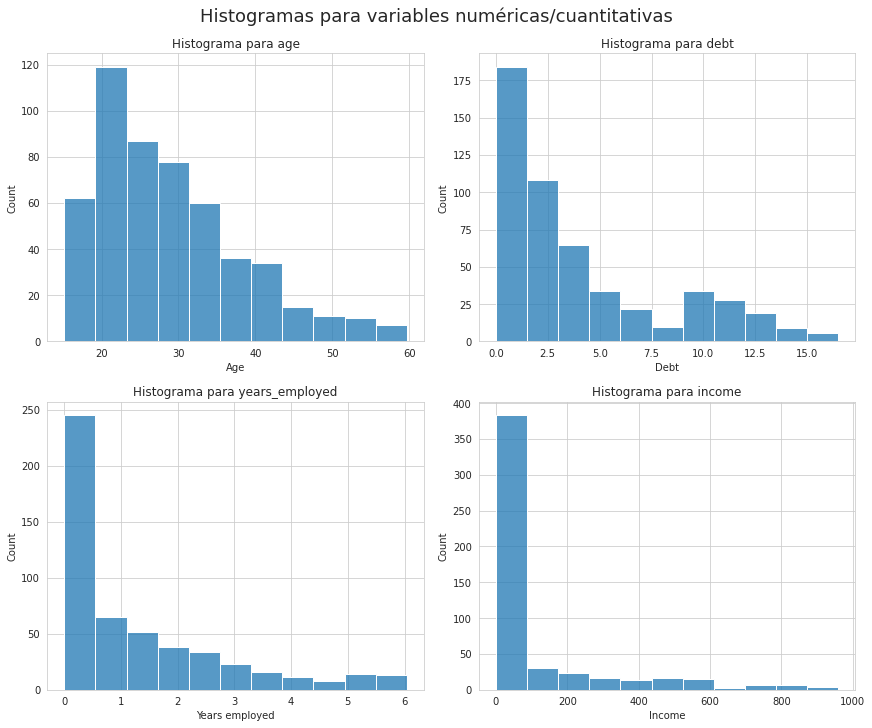

In [ ]:
grafica_histogramas(df_copy[list(df_numerico.columns)])

In [ ]:
#Obtener medidas de asimetría y curtosis
from scipy import stats
from scipy.stats import skew, kurtosis

#Generamos función para imprimir asimetría y curtosis de mis datos cuantitativos
def asm_cur(serie_numerica):
  print(f'Medidas para {serie_numerica.name}')
  print(f'Curtosis: {kurtosis(serie_numerica)}')
  print(f'Asimetría: {skew(serie_numerica)}\n')

In [ ]:
df_copy[list(df_numerico.columns)].apply(asm_cur, axis=0);

Medidas para age
Curtosis: 0.4711144278586903
Asimetría: 0.9709682660972392

Medidas para debt
Curtosis: 0.17670306257774193
Asimetría: 1.1566770605062309

Medidas para years_employed
Curtosis: 1.0713420354790566
Asimetría: 1.3645151515580412

Medidas para income
Curtosis: 4.076360204419746
Asimetría: 2.1896738330259207



In [ ]:
#Generamos gráficas de densidad utilizando categorías
#Creamos una función que nos permita graficar densidades por categoría apiladas
def grafica_densidad_completa(df_completo, columna, categoria):
  
  fig, axis = plt.subplots(figsize=(12, 10));
  sns.kdeplot(df_completo[columna], shade=True, hue=categoria, ax=axis);

  fig.suptitle(f'Gráfica de densidad para {columna} segmentado por {categoria.name}', fontsize=18)

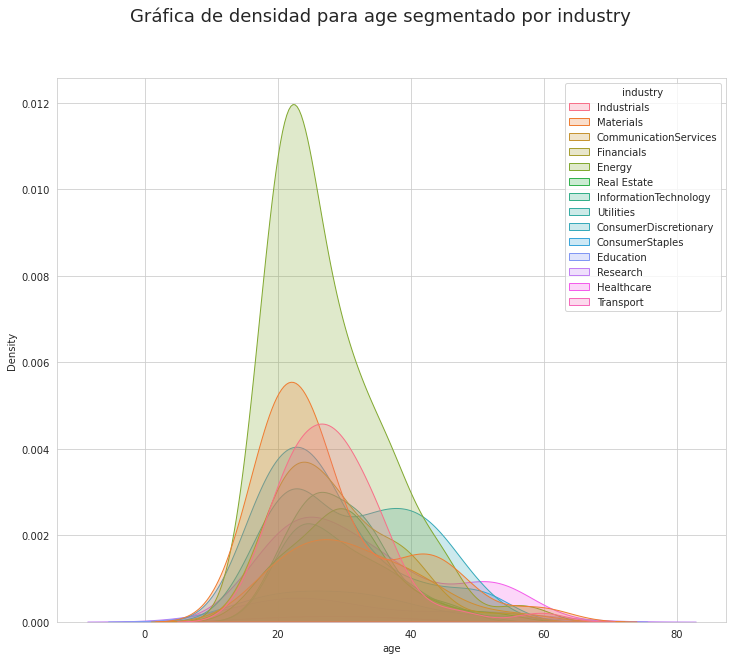

In [ ]:
grafica_densidad_completa(df_copy, 'age', df_copy['industry'])

In [ ]:
#Creamos una función que nos permita graficar densidades por categoría separadas
def grafica_densidad_individual(df_completo, columna, categoria):
  g = sns.FacetGrid(df_completo, col=categoria.name, col_wrap=4, aspect=2);
  g.map(sns.kdeplot, columna);
  g.fig.subplots_adjust(top=0.9)
  g.fig.suptitle(f'Gráfica de densidad para {columna} segmentado por {categoria.name}', fontsize=18)

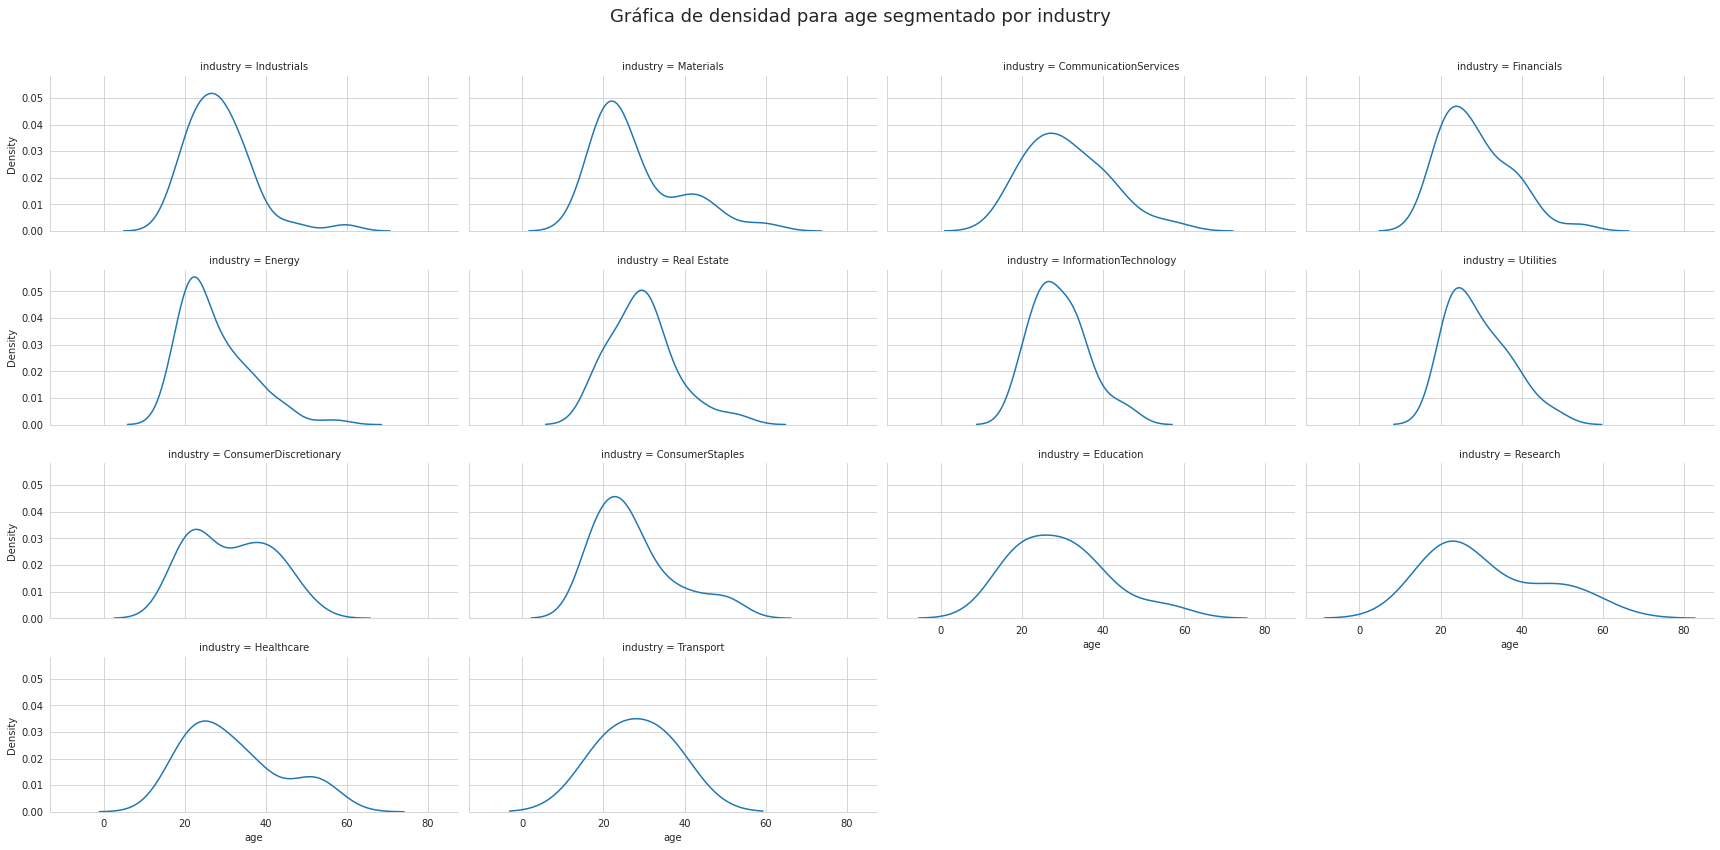

In [ ]:
grafica_densidad_individual(df_copy, 'age', df_copy['industry'])

---
##D. Exploración de variables categóticas y análisis multivariable - Postwork 3


En este Postwork vamos a explorar las distribuciones de las variables categóricas de nuestro dataset. 

* Si ya tienes gráficas realizadas en Postworks anteriores, agrega títulos, anotaciones y leyendas donde sea necesario. También cambia el tamaño de las gráficas donde tenga sentido hacerlo.
* Identifica todas las variables categóricas en tu dataset.
* Utiliza gráficas de barras para explorar la distribución de tus variables categóricas.
* Planea tu análisis multivariable: ¿qué combinaciones de variables categóricas podrían darme información útil acerca de la distribución de mis datos? ¿qué combinaciones de una variable numérica con una variable categórica podrían ser interesantes?
* Utiliza tablas de contingencia y múltiples gráficas en la misma figure para explorar combinaciones de variables categóricas.
* Utiliza boxplots y violinplots para explorar combinaciones de variables numéricas con variables categóricas.

In [ ]:
#Obtener variables categóricas de mi dataset
category_list = list(set(list(df_copy.columns)).difference(list(df_numerico.columns)))

df_categorico_filtrado = df_copy[category_list]

#Se remueve credit_score y zip_code también
category_list = list(set(list(df_categorico_filtrado.columns)).difference(['zip_code', 'credit_score']))
df_categorico_filtrado = df_categorico_filtrado[category_list]

df_categorico_filtrado

,industry,driver_license,gender,citizen,married,prior_default,employed,bank_customer,ethnicity,approved
0,Industrials,0,1,ByBirth,1,1,1,1,White,1
1,Materials,0,0,ByBirth,1,1,1,1,Black,1
2,Materials,0,0,ByBirth,1,1,0,1,Black,1
3,Industrials,1,1,ByBirth,1,1,1,1,White,1
4,Industrials,0,1,ByOtherMeans,1,1,0,1,White,1
...,...,...,...,...,...,...,...,...,...,...
684,CommunicationServices,1,1,ByOtherMeans,1,0,0,1,White,0
685,Education,0,1,ByBirth,0,0,0,0,Black,0
686,Energy,1,0,ByBirth,1,0,1,1,White,0
687,Healthcare,1,0,ByBirth,0,0,1,0,Latino,0


In [ ]:
#Crear gráficas de barras para conocer distribución de mis variables categóricas
#Generamos una función para construir mis gráficas de barras
def grafica_histogramas(df_categorico):
  tam = df_categorico.shape[1]

  r = 2
  c = 5

  fig, axis = plt.subplots(nrows=r, ncols=c, figsize=(24, 14), constrained_layout=True);
  
  ren = col = 0

  for (columnName, columnData) in df_categorico.iteritems():
    counts = columnData.value_counts()
    sns.barplot(x=counts.index, y=counts, ax=axis[ren, col]);
    axis[ren, col].set_title(f'Gráfica de barras para {columnName}')
    axis[ren, col].set_xlabel(columnName.capitalize().replace('_', ' '))
    if(len(counts.index) > 2):
      axis[ren, col].tick_params('x', labelrotation=90)

    col += 1

    if(col == c):
      col = 0
      ren += 1

  fig.suptitle('Gráficas de barras para variables categóricas', fontsize=18)

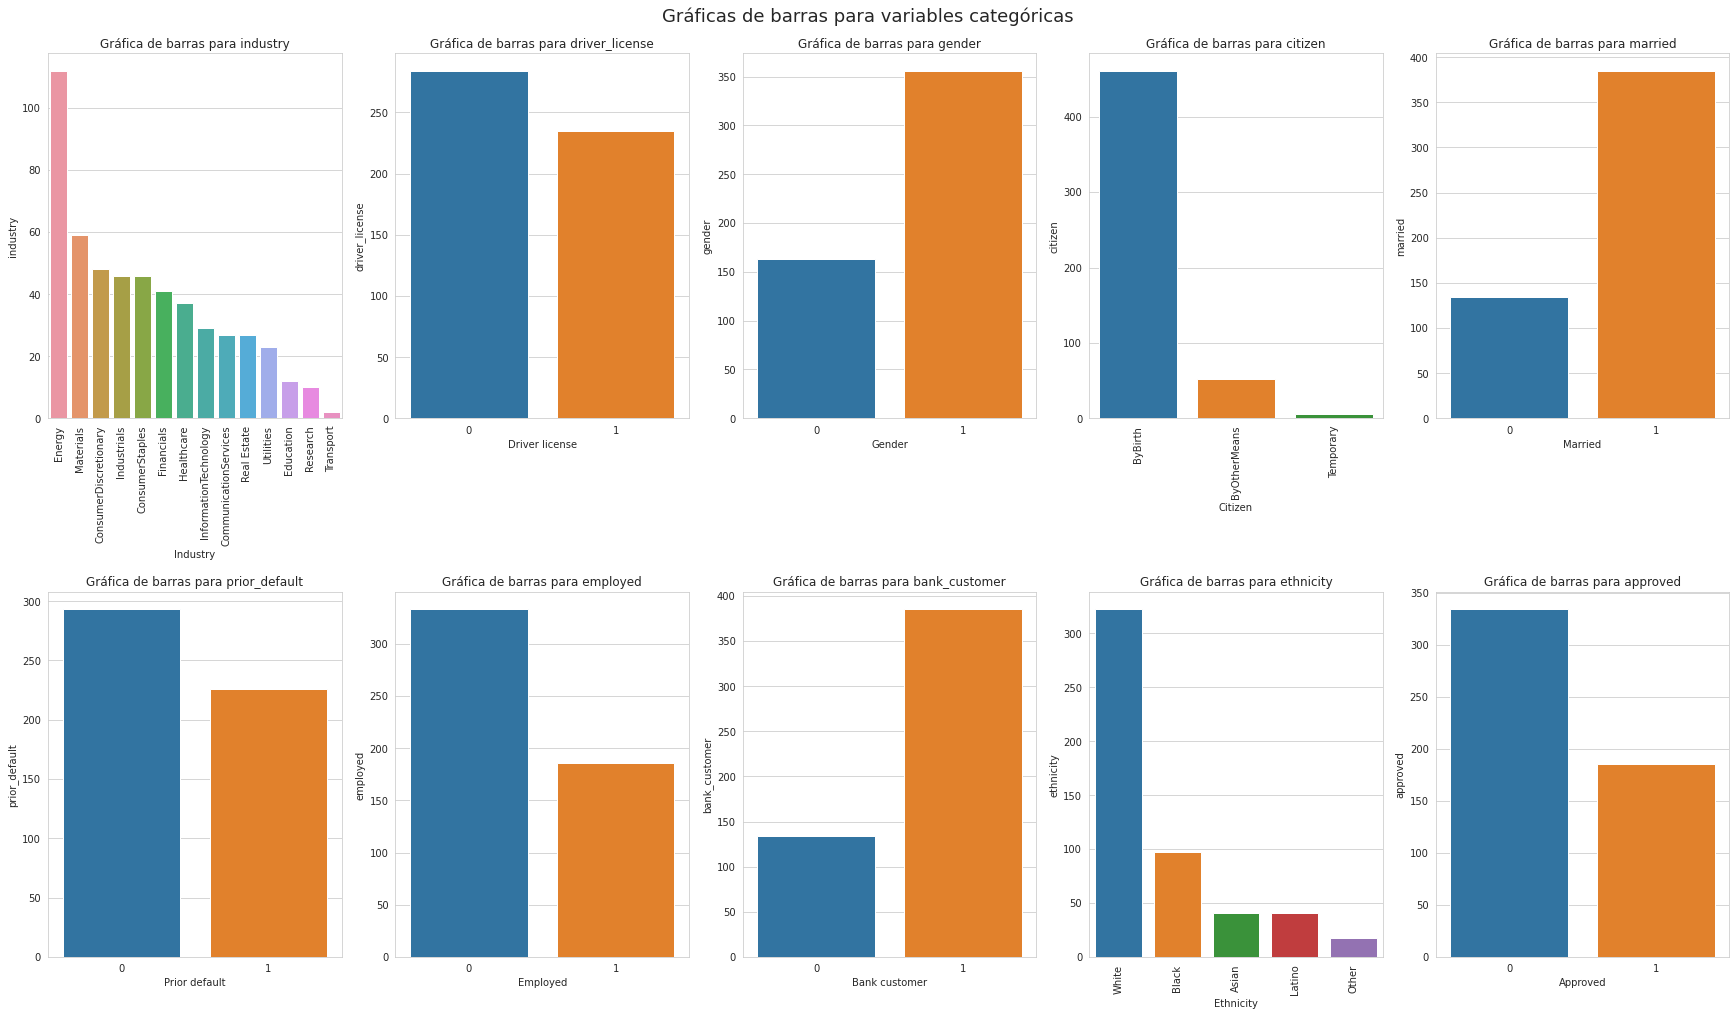

In [ ]:
grafica_histogramas(df_categorico_filtrado)

In [ ]:
#Utiliza tablas de contingencia y múltiples gráficas en la misma figure para explorar combinaciones de variables categóricas.
#Crear función para poder generar tablas de contingencia y gráficas a partir de un par de variables categóricas
def contin_graf(df_categorico, var1, var2):
  crosstab = pd.crosstab(df_categorico[var1], df_categorico[var2])
  print(f'Tabla de contingencia para {var1} y {var2}')
  display(crosstab)

  ele_uni = df_categorico_filtrado['ethnicity'].unique()

  c = int(np.ceil(len(ele_uni)/2))
  r = c - 1

  fig, axes = plt.subplots(nrows = r, ncols = c, figsize=(24, 14), sharex=True, sharey=True)

  ren = col = 0

  for cat in ele_uni:
    sns.barplot(x=crosstab.columns, y=crosstab.loc[cat], ax=axes[ren, col])
    axes[ren, col].set(xlabel='', ylabel='', title=f'{var2.capitalize()} con {var1} {cat.lower()}')

    col += 1

    if(col == c):
      col = 0
      ren += 1

  fig.suptitle(f'Gráficas de barras de {var2} separados por {var1}', fontsize=18);

Tabla de contingencia para ethnicity y married


married,0,1
ethnicity,,
Asian,7,34
Black,25,72
Latino,18,23
Other,6,12
White,78,244


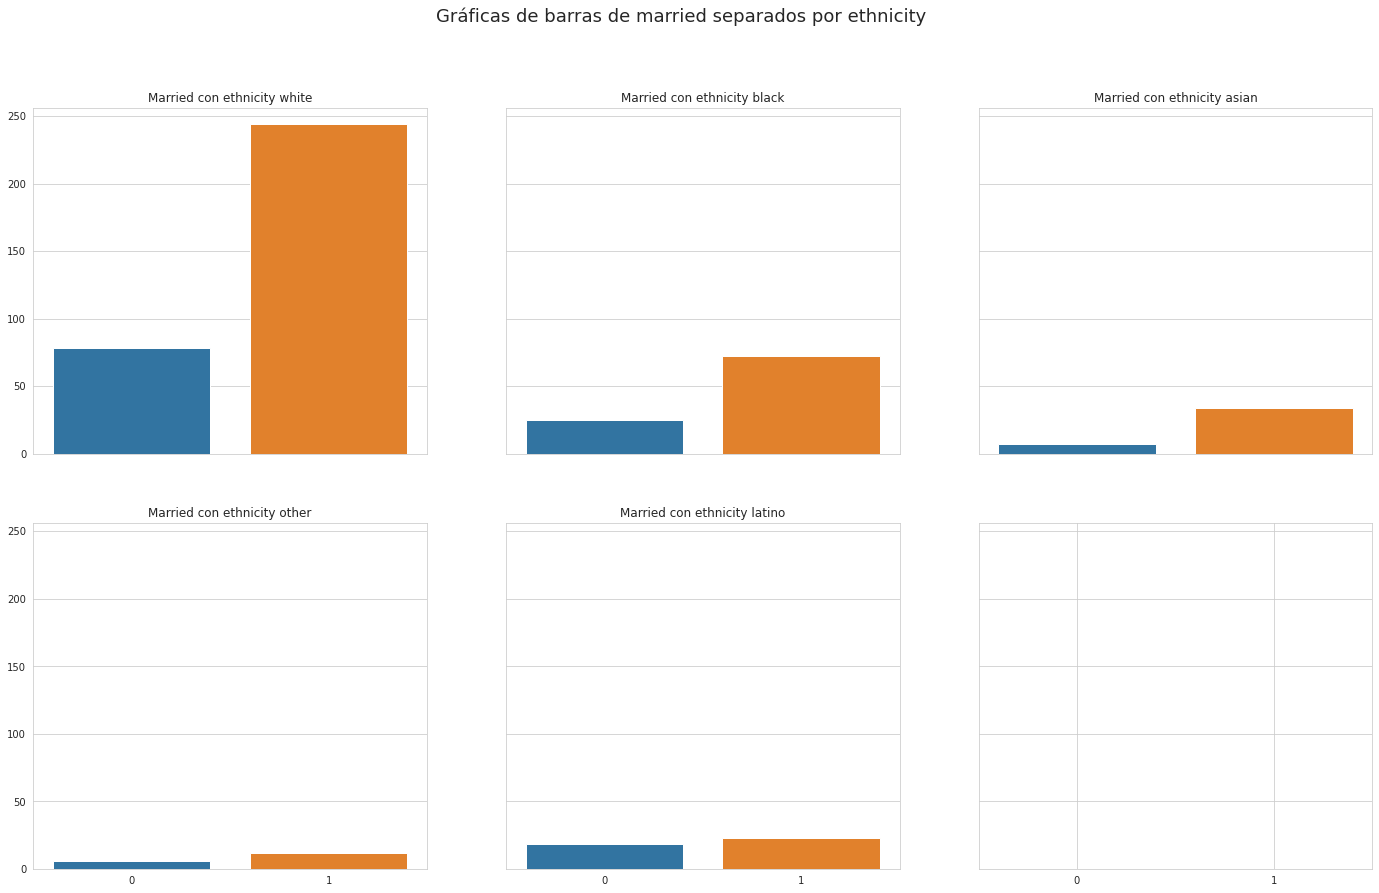

In [ ]:
contin_graf(df_categorico_filtrado, 'ethnicity', 'married')

In [ ]:
#Utiliza boxplots y violinplots para explorar combinaciones de variables numéricas con variables categóricas.
#Generar función para poder crear boxplot, violinplot y su combinación por renglón de variables categóricas 
def create_box_violin_plots(df_completo, var_num, var_cat):

  fig, axis = plt.subplots(nrows = 1, ncols = 3, figsize=(24, 14), sharex=True, sharey=True, constrained_layout=True)  

  sns.boxplot(data=df_completo, x=var_cat, y=var_num, ax=axis[0]);
  axis[0].set_title('Boxplot')

  sns.violinplot(data=df_completo, x=var_cat, y=var_num, ax=axis[1]);
  axis[1].set_title('Violinplot')
  
  sns.boxplot(data=df_completo, x=var_cat, y=var_num, ax=axis[2]);
  sns.violinplot(data=df_completo, x=var_cat, y=var_num, ax=axis[2]);
  axis[2].set_title('Boxplot y violinplot')

  fig.suptitle(f'Box y violin plots de {var_num} separado por {var_cat}', fontsize=18);

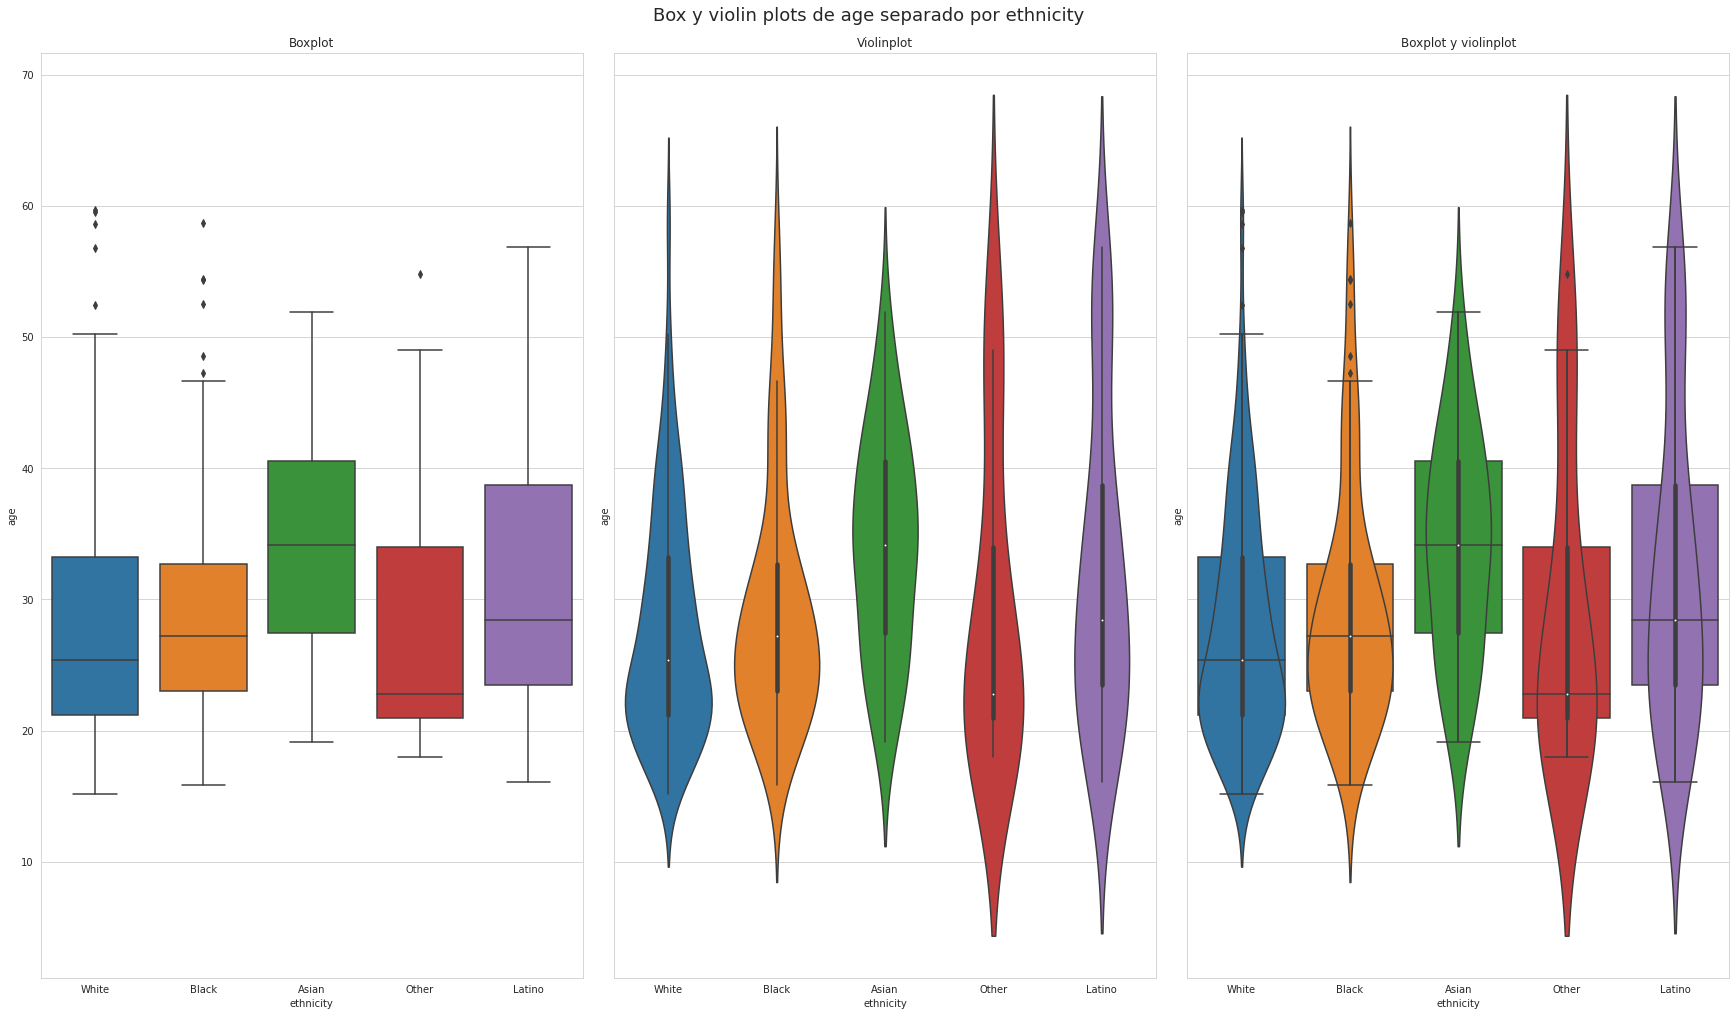

In [ ]:
create_box_violin_plots(df_copy, 'age', 'ethnicity')

---
##E. Correlaciones y regresión linear simple - Postwork 4

En este Postwork vamos a hacer análisis bivariado de nuestras variables numéricas. 

- Identifica cuáles son las variables numéricas en tu dataset.
- Asegúrate de que tengan el tipo de dato correcto y que no haya NaNs por ahí escondidos.
- Genera una matriz de correlaciones y un pairplot para visualizar de manera general las relaciones entre tus variables numéricas.
- Utilizando gráficas de dispersión y tus medidas de locación y dispersión, identifica dónde hay valores atípicos y decide qué hacer con ellos.
- Revisa si tu revisión de valores atípicos cambió de alguna manera las relaciones existentes.
- Donde consideres necesario, entrena modelos de Regresión Lineal con un o más pares de variables. Incluso si no te parece que realizar predicciones entre pares de variables tiene sentido para tu proyecto, prueba realizar un par de regresiones para que practiques el procedimiento.

In [ ]:
#Variables numéricas
df_copy[list(df_numerico.columns)]

,age,debt,years_employed,income
0,30.83,0.000,1.25,0
1,58.67,4.460,3.04,560
2,24.50,0.500,1.50,824
3,27.83,1.540,3.75,3
4,20.17,5.625,1.71,0
...,...,...,...,...
684,40.58,3.290,3.50,0
685,21.08,10.085,1.25,0
686,22.67,0.750,2.00,394
687,25.25,13.500,2.00,1


In [ ]:
#Tipo de dato y NaNs
df_copy[list(df_numerico.columns)].dtypes

age               float64
debt              float64
years_employed    float64
income              int64
dtype: object

In [ ]:
df_copy[list(df_numerico.columns)].isna().sum()

age               0
debt              0
years_employed    0
income            0
dtype: int64

In [ ]:
#Matriz de correlaciones y pairplot
#Crear función que nos genere todo esto
def mat_corr(df_numerico):
  matriz_corre = df_numerico.corr()
  print('Matriz de correlación de variables numéricas:')
  display(matriz_corre)
  print('\n')

  #Heatmap
  plt.figure(figsize=(8, 6))
  ax = sns.heatmap(matriz_corre, vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

Matriz de correlación de variables numéricas:


,age,debt,years_employed,income
age,1.000000,-0.038441,0.203898,-0.003800
debt,-0.038441,1.000000,0.183958,0.071234
years_employed,0.203898,0.183958,1.000000,0.117674
income,-0.003800,0.071234,0.117674,1.000000


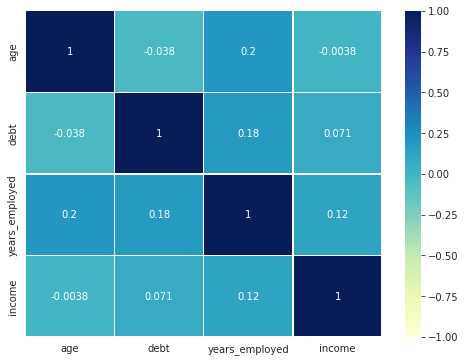

In [ ]:
mat_corr(df_copy[list(df_numerico.columns)])

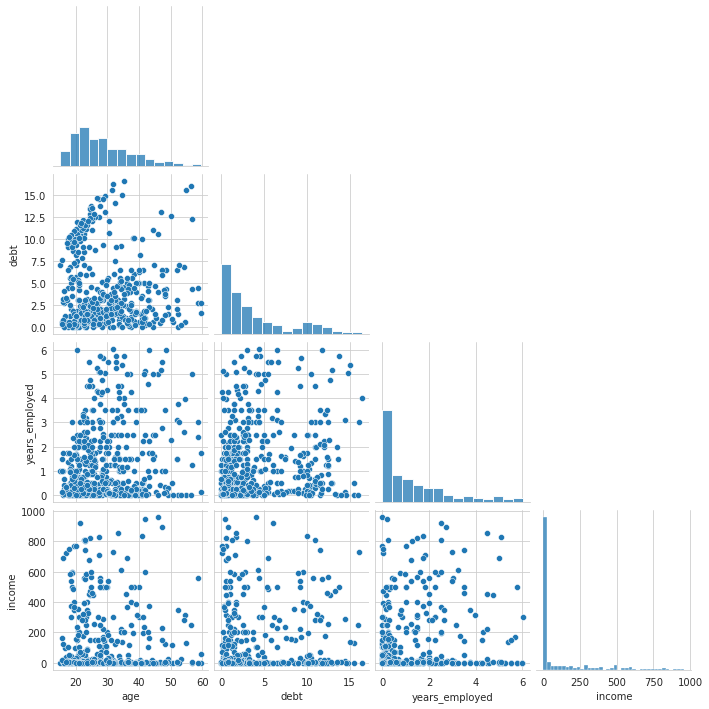

In [ ]:
sns.pairplot(df_copy[list(df_numerico.columns)], corner=True);

Los valores atípicos ya fueron tratados en el postwork 2, por lo que no es necesario hacer ningun filtro adicional.

In [ ]:
#Modelo de regresión lineal
#Importr librerías
from sklearn.linear_model import LinearRegression

def reg_lin(serie_x, serie_y):
  #Generar objeto
  lr = LinearRegression()

  # Usamos `to_frame` para convertir nuestra Serie en una estructura de 2 dimensiones, como lo requiere el modelo
  lr.fit(serie_x.to_frame(), serie_y)

  #Predecimos y con x
  y_predict = lr.predict(serie_x.to_frame())

  #Graficamos nuestros puntos y nuestra predección
  sns.scatterplot(x=serie_x, y=serie_y, s=40);
  sns.scatterplot(x=serie_x, y=y_predict, s=25);

  #Obtenemos los coeficientes de la regresión
  intercept = lr.intercept_
  coefficient = lr.coef_[0]

  #Los imprimimos
  print(f'y = {coefficient} * x + {intercept}')

  #Obtenemos el score de nuestro modelo
  print(f'R2: {lr.score(serie_x.to_frame(), serie_y)}')

y = -0.016704371401243753 * x + 4.462233116848234
R2: 0.0014776782620481432


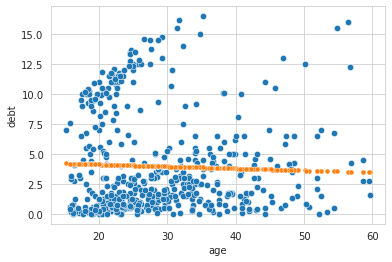

In [ ]:
reg_lin(df_copy['age'], df_copy['debt'])

---
##F. Distribuciones muestrales y técnicas de evaluación de modelos - Postwork 5


En este Postwork vamos a analizar la incertidumbre y los sesgos que existen en las medidas de locación y dispersión de nuestras variables numéricas, además de practicar el entrenamiento de modelos de Regresión Lineal Múltiple:
*   Identifica las variables numéricas en tu dataset y revisa las medidas de locación y dispersión que ya has realizado de ellas.
* Utilizando la técnica de bootstrap, explora las distribuciones muestrales de las estadísticas que obtuviste anteriormente y reporta:
  * La distribución, su asimetría y curtosis
  * El error estándar
  * El intervalo de confianza que te parezca más apropiado
* Si tiene sentido, elige algunas de tus variables numéricas para entrenar uno o más modelos de Regresión Lineal Múltiple. Utiliza las técnicas de división de dataset y validación cruzada de K-iteraciones para asegurarte de que tu modelo generalice.

### F.1. Distribuciones muestrales.

A continuación se muestran las variables numéricas identificadas en el dataset y sus medidas de dispersión y locación:

In [ ]:
#Variables numéricas del dataset
print("\t*** Las variables numericas son: ***")
print(df_numerico.head())
print("\n\t*** Sus estadisticos son: ***")
print(describe_var_num)

	*** Las variables numericas son: ***
     age   debt  years_employed  income
0  30.83  0.000            1.25       0
1  58.67  4.460            3.04     560
2  24.50  0.500            1.50     824
3  27.83  1.540            3.75       3
4  20.17  5.625            1.71       0

	*** Sus estadisticos son: ***
              age        debt  years_employed      income
count  519.000000  519.000000      519.000000  519.000000
mean    28.931541    3.978950        1.315424  105.319846
std      9.415928    4.091696        1.501684  204.876387
min     15.170000    0.000000        0.000000    0.000000
25%     21.920000    0.832500        0.165000    0.000000
50%     26.670000    2.335000        0.750000    1.000000
75%     34.125000    5.772500        2.000000  102.500000
max     59.670000   16.500000        6.040000  960.000000


In [ ]:
#Función para aplicar bootstraping
def bootstrapping(df, column, metric):
  bootstrapped_column = df[column]
  metrics = []
  #Aplica bootstrap con las medias de las muestras.
  if metric=='mean':
    for i in range(100_000):
        sample = bootstrapped_column.sample(n=50, replace=True)
        metrics.append(sample.mean())
  #Aplica bootstrap con las medianas de las muestras.
  elif metric=='median':
    for i in range(100_000):
        sample = bootstrapped_column.sample(n=50, replace=True)
        metrics.append(sample.median())
  
  series_metrics = pd.Series(metrics)
  return(series_metrics)

In [ ]:
#Función que realiza el bootstrapping de la columna indicada del dataframe.
#Obtiene asimetría, curtosis, error estándar, intervalo de confianza y gráfica su distribución.
def sample_distribution_exploration(df, column, metric, x_axis, y_axis):
  #Bootstrapping de la columna indicada del dataframe
  series_column_metrics=bootstrapping(df,column,metric)

  #Cálculo de curtosis y asímetría.
  skewness=series_column_metrics.skew()
  kurtosis=series_column_metrics.kurtosis()

  #Cálculo del error estándar
  ste=series_column_metrics.std()
  rango=series_column_metrics.max() - series_column_metrics.min()

  #Cálculo de límites inferior y superior.
  limit_inf = series_column_metrics.quantile(0.025)
  limit_sup = series_column_metrics.quantile(0.975)

  #Graficación de la distribución.
  g = sns.histplot(series_column_metrics, kde=False,ax=axs[x_axis, y_axis])
  g.axvline(x=limit_inf, color='r')
  g.axvline(x=limit_sup, color='r')
  g.axes.set_title(f'{metric}s de {column}')
  if metric=='mean':
    mean_conf_interval = f'Intervalo de 95% de confianza de la media: {round(limit_inf,4)} < {round(series_column_metrics.mean(),4)} < {round(limit_sup,4)}'
    g.set_xlabel(f'Asimetría: {skewness}\nCurtosis: {kurtosis}\nError estándar: {ste}\nRango: {rango}\n{mean_conf_interval}', fontsize=10)
  elif metric=='median':
    median_conf_interval = f'Intervalo de 95% de confianza de la mediana: {limit_inf} < {series_column_metrics.median()} < {limit_sup}'
    g.set_xlabel(f'Asimetría: {skewness}\nCurtosis: {kurtosis}\nError estándar: {ste}\nRango: {rango}\n{median_conf_interval}', fontsize=10)

Al aplicar bootstrap, se puede realizar una mejor exploración de las distribuciones de los atributos del dataset.

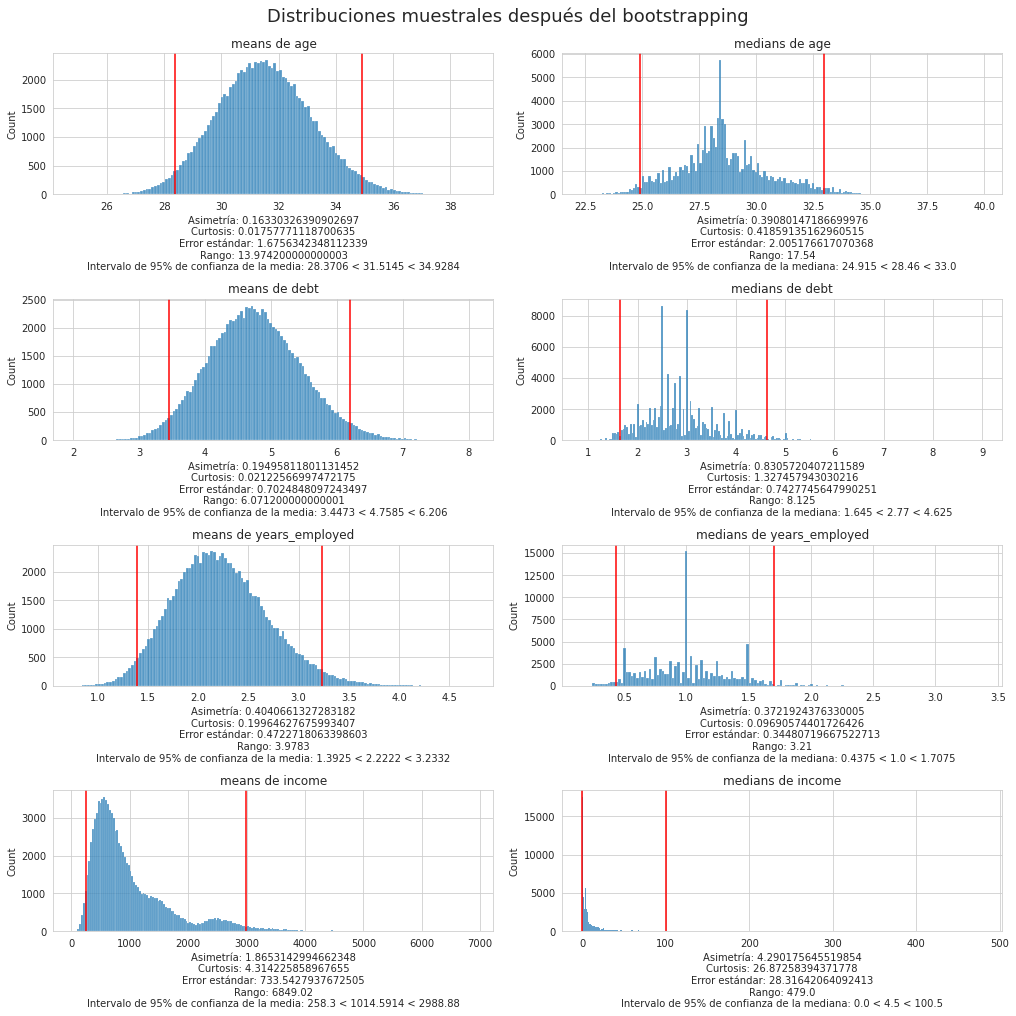

In [ ]:
#Exploración de las distribuciones muestrales después de la aplicación de bootstrap.
fig, axs = plt.subplots(4, 2, figsize=(14, 14), constrained_layout=True);

for subrow,column in enumerate(list(df_numerico.columns)):
  sample_distribution_exploration(df,column,'mean',subrow,0)
  sample_distribution_exploration(df,column,'median',subrow,1)

plt.suptitle("Distribuciones muestrales después del bootstrapping", fontsize=18)
plt.show()

Puede notarse que el atributo income viene con sesgos desde la toma de la muestra, esto debido a que...

### F.2. Regresión lineal múltiple con datasets de entrenamiento y prueba.

Ahora pasamos a aplicar regresión lineal múltiple con los atributos: age, debt y years_employed, de los cuales age y years_employed serán las varibles independientes, y debt será la variable a predecir.

In [ ]:
from sklearn.model_selection import train_test_split
x = df_numerico[['age','years_employed']]
y = df_numerico['debt']

Dividimos el dataset en dos: 70% para entrenamiento y 30% para prueba:

In [ ]:
x_training, x_test, y_training, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

Procedemos a entrenar el modelo y posteriormente a validar su desempeño:

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#Entrenamiento
lr.fit(x_training, y_training)
#Validación
r2 = lr.score(x_test, y_test)
print(f'El valor r2 es {r2}')

El valor r2 es 0.10506359597051484


### F.3. Regresión lineal múltiple con validación cruzada.

Procedemos a entrenar un nuevo modelo y comprobar su rendiemiento usando validación cruzada:

In [ ]:
from pandas._libs.tslibs import ccalendar
from sklearn.model_selection import cross_validate
lr = LinearRegression()
#Entrenamiento y aplicación de la validación cruzada
scores = cross_validate(lr, x, y, scoring='r2', cv=3)
print(scores)
print(f'\nScore del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

{'fit_time': array([0.00314546, 0.00312686, 0.00220108]), 'score_time': array([0.15690184, 0.00171733, 0.00156283]), 'test_score': array([0.06053833, 0.03288697, 0.09500142])}

Score del modelo: 0.063 +/- 0.025


---
##G. Visualización de datos avanzada - Postwork 6


---
##H. Pruebas A/B y procesamiento del lenguaje natural - Postwork 7

Dado que nuestro proyecto no es sobre procesamiento de lenguaje natural, y no es posible aplicar pruebas A/B, se omite esta parte.

---
##I. Introducción a Machine Learning - Postwork 8

### I.1. Regresión logística

Suponiendo que todas las columnas tienen datos correctos y el dataset está limpio, además de que todos los valores tienen sentido, se utilizarán todas las columnas para el proceso para intentar entrenar un modelo de Regresión Logística para clasificar las solicitudes de TDC aprobadas y no aprobadas.

In [151]:
df_ml = df.copy()

In [152]:
df_ml.head()

,gender,age,debt,married,bank_customer,industry,ethnicity,years_employed,prior_default,employed,credit_score,driver_license,citizen,zip_code,income,approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


Dado que necesitamos utilizar varaibles numéricas para nuestro modelo de regresión logística, cambiaremos las variables categóricas a números mediante el método _pandas.get_dummies_, que generará una columna por cada valor de cada variable categórica, objeto o cadena.

In [153]:
#Obtenemos el dataframe con todos los datos numéricos
df_ml_dummy= pd.get_dummies(df_ml)

In [154]:
df_ml_dummy.head()

,gender,age,debt,married,bank_customer,years_employed,prior_default,employed,credit_score,driver_license,...,industry_Transport,industry_Utilities,ethnicity_Asian,ethnicity_Black,ethnicity_Latino,ethnicity_Other,ethnicity_White,citizen_ByBirth,citizen_ByOtherMeans,citizen_Temporary
0,1,30.83,0.000,1,1,1.25,1,1,1,0,...,0,0,0,0,0,0,1,1,0,0
1,0,58.67,4.460,1,1,3.04,1,1,6,0,...,0,0,0,1,0,0,0,1,0,0
2,0,24.50,0.500,1,1,1.50,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1,27.83,1.540,1,1,3.75,1,1,5,1,...,0,0,0,0,0,0,1,1,0,0
4,1,20.17,5.625,1,1,1.71,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


Ahora entrenaremos el modelo

In [155]:
#Separamos nuestro data set en X y Y
X = df_ml_dummy.drop(columns=['approved'])
y = df_ml_dummy['approved']

In [156]:
#importamos la biblioteca necesaria
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [157]:
#Separamos nuestro dataset en entrenamiento y prueba, asignando un 30% de los datos al dataset de prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [158]:
#Definimos el máximo de iteraciones
logreg = LogisticRegression(max_iter=10000)

In [159]:
#Ajustamos el modelo
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [160]:
#Realizamos la predicción
y_pred = logreg.predict(X_test)

Obtenemos la exactitud del modelo mediante el método _score_.

In [161]:
logreg.score(X_test, y_test)

0.8647342995169082

### I.2. Matriz de confusión

Evaluaremos el modelo de clasificación binaria mediante una matriz de confusión.

In [162]:
#Importamos la biblioteca necesaria
from sklearn import metrics

In [163]:
#Creamos la matriz
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[99, 21],
       [ 7, 80]])

Obtenemos los datos de nuestra matriz de confusión y los visualizamos mediante un heatmap.

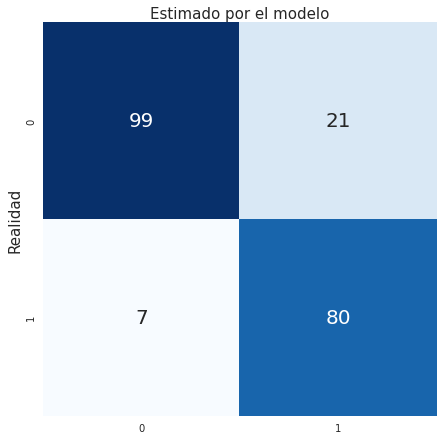

In [164]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

Finalmente utilizamos las 4 medidas de evaluación:
* Precisión
* Exactitud
* Sensibilidad
* Especificidad

In [165]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.7920792079207921
Exactitud: 0.8647342995169082
Sensibilidad: 0.9195402298850575
Especificidad: 0.825


Los resultados indican que el modelo es relativamente bueno, pues los valores son más cercanos a 1 de lo que son a 0.5

### I.3 Curva ROC / AUC

Ahora evaluamos nuestro modelo de clasificación binaria utilizando una curva ROC / AUC.

Para graficar una curva ROC / AUC necesitamos resultados probabilísticos, como estos:


In [166]:
y_pred_proba = logreg.predict_proba(X_test)

y_pred_proba[:10,:]

array([[0.94467019, 0.05532981],
       [0.00109514, 0.99890486],
       [0.97269051, 0.02730949],
       [0.94472248, 0.05527752],
       [0.87144778, 0.12855222],
       [0.94711285, 0.05288715],
       [0.96564379, 0.03435621],
       [0.9382926 , 0.0617074 ],
       [0.20783453, 0.79216547],
       [0.06278335, 0.93721665]])

In [167]:
#Importamos las biblioteca necesaria
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

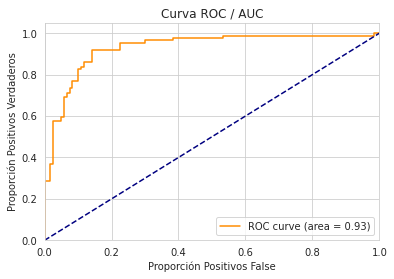

In [168]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

Nuestro valor AUC es muy cercano al 1 (0.93). Esto significa que nuestro modelo puede diferenciar casi a la perfección entre negativos y positivos, y que además es muy probable que elija la clasificación correcta.